In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
### define a class of graph objects

class Graph():

  def __init__(self, G):
      self.graph=G
      self.V=len(G[0, :])
  
   ### plot graph method
  def plot_graph(self):
      G_graph = nx.from_numpy_array(self.graph)

      pos = nx.spring_layout(G_graph)  # Position nodes using the Fruchterman-Reingold force-directed algorithm
      nx.draw(G_graph, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')

      edge_labels = {(i, j): self.graph[i][j] for i, j, d in G_graph.edges(data=True)}
      nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_color='red')
      plt.show()
  
  ### defining Dijkstra shortest path algorithm for a given source node
  def Dijkstra(self, src):
    # initializing the Minimum Spanning Tree
      MST = np.zeros(np.shape(self.graph))
        
    # initializing the list of visited and not visited vertices
      nonvisited = list(range(self.V))
      nonvisited.remove(src)
      visited = [src]
    
    # initializing distance array
      dist = [float(sys.maxsize)] *self.V
      dist[src] = 0

      while nonvisited != []:
            # set a matrix with infinite entries to store potential minimum distance paths
            M = np.array([[float(sys.maxsize)]*self.V]*self.V)
            
            #  update M iteratively
            for w in visited:
                addist = np.zeros(self.V)
                addist[np.where(self.graph[w, :] > 0)[0]] = dist[int(w)]
                addist[visited] = float(sys.maxsize)
                addist[np.where(self.graph[w, :] <= 0)[0]] = float(sys.maxsize)
                M[w, np.argmin(self.graph[w, :] + addist)] = np.min(self.graph[w, :] + addist)
            
            # retrieving the next node to visit from M
            min_row, min_col = np.unravel_index(M.argmin(), M.shape)
            
            # update the Minimum Spanning Tree and distance
            MST[min_row, min_col] = self.graph[min_row, min_col]
            dist[min_col] = dist[min_row] + self.graph[min_row, min_col]

            visited.append(min_col)
            nonvisited.remove(min_col)


      return (MST+np.transpose(MST), dist)

  ### defining subgraph with optimal solution
  def subgraph(self, src):
      return(self.Dijkstra(src)[0])
  
  ### plotting the optimal subgraph 
  def plot_subgraph(self, src):
        G_graph = nx.from_numpy_array(self.graph)

        node_colors = ['green' if node == src else 'red' for node in G_graph.nodes()]

        pos = nx.spring_layout(G_graph)  # position nodes 
        nx.draw(G_graph, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=10, font_color='black')

        subgraph_edges = nx.from_numpy_array(self.Dijkstra(src)[0]).edges()

        # highlight subgraph edges 
        edge_colors = ['red' if (u, v) in subgraph_edges or (v, u) in subgraph_edges else 'black'
                       for u, v in G_graph.edges()]
        nx.draw_networkx_edges(G_graph, pos, edgelist=G_graph.edges(), edge_color=edge_colors)

        edge_labels = {(i, j): self.graph[i][j] for i, j, d in G_graph.edges(data=True)}
        nx.draw_networkx_edge_labels(G_graph, pos, edge_labels=edge_labels, font_color='red')

        plt.show()


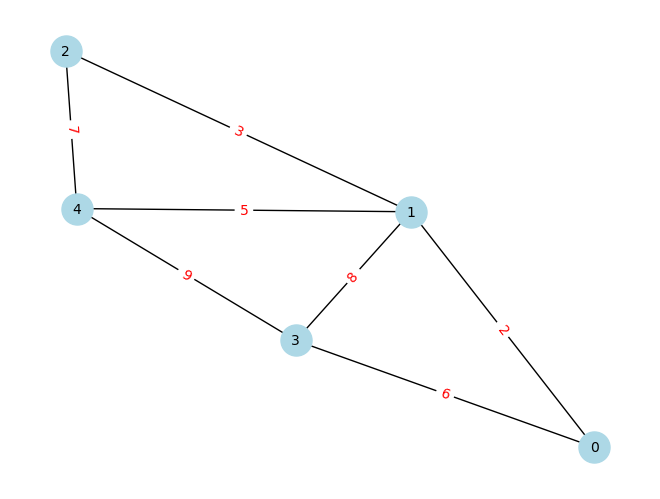

In [3]:
# Example usage
G = Graph(np.array([[0, 2, 0, 6, 0],
              [2, 0, 3, 8, 5],
              [0, 3, 0, 0, 7],
              [6, 8, 0, 0, 9],
              [0, 5, 7, 9, 0]]))

G.plot_graph()

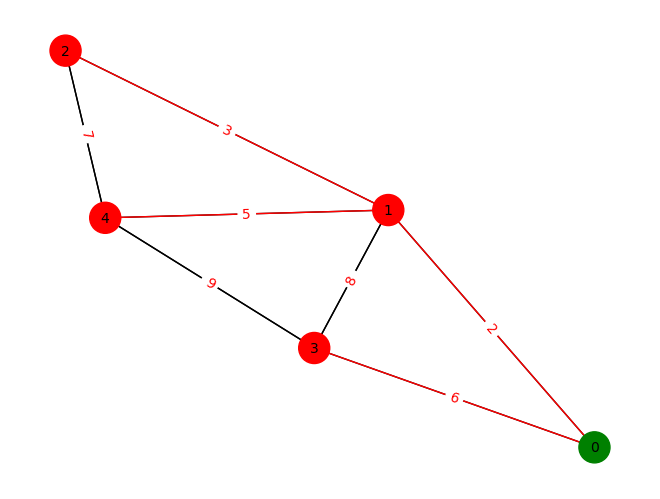

In [4]:
### ploting the optimal subgraph solution
G.plot_subgraph(0)